In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [6]:
#load data
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore',category=FutureWarning)

df = pd.read_csv("D:/Python/exercise/iris.data",header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [8]:
print(np.unique(df[4]))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Sklearn API

In [9]:
#Kmeans - sklearn
x = df.iloc[:,:4]
y = pd.Categorical(df[4]).codes
km = KMeans(n_clusters=3,random_state=20).fit(x)
labels = km.labels_
#algo = GridSearchCV(estimator = km,param_grid={"n_clusters":[2,3,4,5,6,7,8]})

In [10]:
#model evaluation
#print(algo.best_estimator_)
#print(algo.best_estimator_.score(x))
print('silhouette score:',metrics.silhouette_score(x,labels,metric='euclidean'))
print('v_measure score:',metrics.v_measure_score(y,labels))
print('completeness:',metrics.completeness_score(y,labels))
print('homogeneity score:',metrics.homogeneity_score(y, labels))

silhouette score: 0.5525919445499757
v_measure score: 0.7581756800057784
completeness: 0.7649861514489815
homogeneity score: 0.7514854021988338


Scipy API

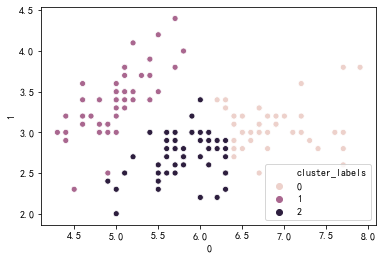

In [11]:
#kmeans - scipy
from scipy.cluster.vq import kmeans, vq
import seaborn as sns

#generate centers and labels
cluster_centers, _ = kmeans(df[[0,1]],3)
df['cluster_labels'],_ = vq(df[[0,1]], cluster_centers)

#plot cluster
sns.scatterplot(x=df[0], y=df[1],hue='cluster_labels', data=df)
plt.show()

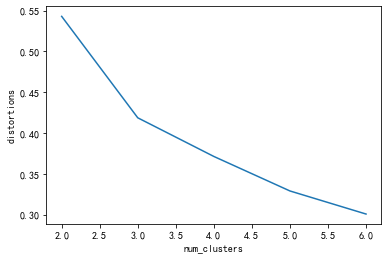

In [12]:
#elbow method 
distortions = []
num_clusters = range(2,7)

#populating distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df[[0,1]],i)
    distortions.append(distortion)
    
#plotting elbow plot
elbow_plot_data = pd.DataFrame({'num_clusters':num_clusters,
                               'distortions': distortions})
sns.lineplot(x='num_clusters',y='distortions', data = elbow_plot_data)
plt.show()

Kmeans 伪代码

In [13]:
import numpy as np
import matplotlib.pyplot as plt
 
# 加载数据
def loadDataSet(fileName):
    data = np.loadtxt(fileName,delimiter='\t')
    return data
 
# 欧氏距离计算
def distEclud(x,y):
    return np.sqrt(np.sum((x-y)**2))  # 计算欧氏距离
 
# 为给定数据集构建一个包含K个随机质心的集合
def randCent(dataSet,k):
    m,n = dataSet.shape
    centroids = np.zeros((k,n))
    for i in range(k):
        index = int(np.random.uniform(0,m)) #
        centroids[i,:] = dataSet[index,:]
    return centroids
 
# k均值聚类
def KMeans(dataSet,k):
    m = np.shape(dataSet)[0]  #行的数目
    # 第一列存样本属于哪一簇，第二列存样本的到簇的中心点的误差
    clusterAssment = np.mat(np.zeros((m,2)))
    clusterChange = True
    # 第1步 初始化centroids
    centroids = randCent(dataSet,k)
    while clusterChange:
        clusterChange = False
        # 遍历所有的样本（行数）
        for i in range(m):
            minDist = 100000.0
            minIndex = -1
            # 遍历所有的质心
            #第2步 找出最近的质心
            for j in range(k):
                # 计算该样本到质心的欧式距离
                distance = distEclud(centroids[j,:],dataSet[i,:])
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            # 第 3 步：更新每一行样本所属的簇
            if clusterAssment[i,0] != minIndex:
                clusterChange = True
                clusterAssment[i,:] = minIndex,minDist**2
        #第 4 步：更新质心
        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == j)[0]]  # 获取簇类所有的点
            centroids[j,:] = np.mean(pointsInCluster,axis=0)   # 对矩阵的行求均值
    print("Congratulations,cluster complete!")
    return centroids,clusterAssment
 